# **Olist Customer Segmentation Modeling**

# Derived features

## Order processing time

Time features derived from the following `order`'s 5 dates:
1. $t_1$ = `purchase_timestamp`
2. $t_2$ = `approved_at`
3. $t_3$ = `delivered_carrier_date`
4. $t_4$ = `delivered_customer_date`
5. $t_5$ = `estimated_delivery_date`

are 10 intervals in days between each of these dates, among which the total time between the order and its delivery to the customer :
* $dt_{12}$ = `approval_time` = $t_2 - t_1$
* $dt_{13}$ = `carrier_delivering_time`
* $dt_{14}$ = `customer_delivering_time`
* $dt_{15}$ = `processing_estimated_time`
* $dt_{23}$ = `approval_to_carrier_delivery_time`
* $dt_{24}$ = `approval_to_customer_delivery_time`
* $dt_{25}$ = `approval_to_estimated_delivery_time`
* $dt_{34}$ = `transit_time`
* $dt_{35}$ = `estimated_transit_time`
* $dt_{45}$ = `delivery_advance_time`


In [9]:
from pepper_commons import discrete_stats
from olist_commons import get_order_times
order_times = get_order_times()
display(discrete_stats(order_times))

,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
approval_time,99281,33475,160,0.998391,0.337174,timedelta64[ns]
carrier_delivering_time,97658,88352,1783,0.982070,0.904708,timedelta64[ns]
customer_delivering_time,96476,93809,2965,0.970183,0.972356,timedelta64[ns]
processing_estimated_time,99441,96677,0,1.000000,0.972205,timedelta64[ns]
approval_to_carrier_delivery_time,97644,87498,1797,0.981929,0.896092,timedelta64[ns]
approval_to_customer_delivery_time,96462,93853,2979,0.970043,0.972953,timedelta64[ns]
approval_to_estimated_delivery_time,99281,92338,160,0.998391,0.930067,timedelta64[ns]
transit_time,96475,92239,2966,0.970173,0.956092,timedelta64[ns]
estimated_transit_time,97658,81053,1783,0.982070,0.829968,timedelta64[ns]
delivery_advance_time,96476,91915,2965,0.970183,0.952724,timedelta64[ns]


In [8]:
from pepper_commons import discrete_stats
from olist_commons import (
    get_order_times,
    index_of_delivered_orders,
    index_of_undelivered_orders,
)

order_times = get_order_times(index_of_delivered_orders())
display(discrete_stats(order_times, 'delivered_order_times'))

,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
order_times,,,,,,
approval_time,96464,32631,14,0.999855,0.338271,timedelta64[ns]
carrier_delivering_time,96476,87388,2,0.999979,0.905800,timedelta64[ns]
customer_delivering_time,96470,93803,8,0.999917,0.972354,timedelta64[ns]
processing_estimated_time,96478,93887,0,1.000000,0.973144,timedelta64[ns]
approval_to_carrier_delivery_time,96462,86539,16,0.999834,0.897130,timedelta64[ns]
approval_to_customer_delivery_time,96456,93849,22,0.999772,0.972972,timedelta64[ns]
approval_to_estimated_delivery_time,96464,89848,14,0.999855,0.931415,timedelta64[ns]
transit_time,96469,92235,9,0.999907,0.956110,timedelta64[ns]
estimated_transit_time,96476,80125,2,0.999979,0.830517,timedelta64[ns]


In [10]:
undelivered_order_times = get_order_times(index_of_undelivered_orders())
display(discrete_stats(undelivered_order_times, 'undelivered_order_times'))

,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
undelivered_order_times,,,,,,
approval_time,2817,2008,146,0.950726,0.712815,timedelta64[ns]
carrier_delivering_time,1182,1180,1781,0.398920,0.998308,timedelta64[ns]
customer_delivering_time,6,6,2957,0.002025,1.000000,timedelta64[ns]
processing_estimated_time,2963,2958,0,1.000000,0.998313,timedelta64[ns]
approval_to_carrier_delivery_time,1182,1175,1781,0.398920,0.994078,timedelta64[ns]
approval_to_customer_delivery_time,6,6,2957,0.002025,1.000000,timedelta64[ns]
approval_to_estimated_delivery_time,2817,2813,146,0.950726,0.998580,timedelta64[ns]
transit_time,6,6,2957,0.002025,1.000000,timedelta64[ns]
estimated_transit_time,1182,1181,1781,0.398920,0.999154,timedelta64[ns]


## Products volume and density

Physical features derived from `weight_g`, `length_cm`, `height_cm`, `width_cm` base physical features.

Defined only for the **32 340** dimensioned products.

In [12]:
from pepper_commons import discrete_stats
from olist_commons import (
    get_products,
    index_of_dimensioned_products
)
 
dimensioned_products = get_products(
    products_index=index_of_dimensioned_products()
)
display(discrete_stats(dimensioned_products, 'dimensioned_products'))

,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
dimensioned_products,,,,,,
category_name,32340,73,609,0.981517,0.002257,object
name_lenght,32340,66,609,0.981517,0.002041,object
description_lenght,32340,2960,609,0.981517,0.091528,object
photos_qty,32340,19,609,0.981517,0.000588,object
weight_g,32949,2204,0,1.000000,0.066891,float64
length_cm,32949,99,0,1.000000,0.003005,float64
height_cm,32949,102,0,1.000000,0.003096,float64
width_cm,32949,95,0,1.000000,0.002883,float64


In [2]:
from pepper_commons import discrete_stats
from olist_commons import (
    index_of_dimensioned_products,
    get_product_physical_features,
)

dimensioned_products_physicial_features = get_product_physical_features(
    products_index=index_of_dimensioned_products()
)
display(discrete_stats(
    dimensioned_products_physicial_features,
    'dimensioned_products_physicial_features'
))

,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
dimensioned_products_physicial_features,,,,,,
volume_cm^3,32949,4525,0,1.0,0.137333,float64
density_g_cm^-3,32949,13659,0,1.0,0.414550,float64


## Customer features

### Order count

Reminder :
* 97% of customers only ordered once
* 3% ordered twice
* Less than 0.25% of customers ordered more than twice.
    * Many of these customers have ordered up to 7 times.
    * One customer ordered 9 times, and another 17 times.
* Any customer has ordered at least once (no leads).
* We verfiy that $\sum{n_c} = 96 096$ and $\sum{n_c n_o} = 99 441$

In [1]:
from olist_commons import get_customer_order_counts
customer_order_counts = get_customer_order_counts()
display(customer_order_counts.sort_values(ascending=False))

customer_id
8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
6469f99c1f9dfae7733b25662e7f1782     7
ca77025e7201e3b30c44b472ff346268     7
1b6c7548a2a1f9037c1fd3ddfed95f33     7
                                    ..
5657dfebff5868c4dc7e8355fea865c4     1
5657596addb4d7b07b32cd330614bdf8     1
5656eb169546146caeab56c3ffc3d268     1
5656a8fabc8629ff96b2bc14f8c09a27     1
ffffd2657e2aad2907e67c3e9daecbeb     1
Name: order_id, Length: 96096, dtype: int64

# Dataset selections

## Between dates

### First and last dates

In [1]:
from olist_commons import (
    get_first_order_date,
    get_last_order_date,
    index_of_delivered_orders
)

from_date = get_first_order_date()  # + pd.Timedelta('3 day')
to_date = get_last_order_date()  # - pd.Timedelta('3 day')

display(from_date)
display(to_date)

delivered_orders_index = index_of_delivered_orders()

display(get_first_order_date(delivered_orders_index))
display(get_last_order_date(delivered_orders_index))

Timestamp('2016-09-04 21:15:19')

Timestamp('2018-10-17 17:30:18')

Timestamp('2016-09-15 12:16:38')

Timestamp('2018-08-29 15:00:37')

### xx Age in days of a dated order event

In [3]:
from olist_commons import (
    get_first_order_date,
    get_last_order_date,
    index_of_delivered_orders,
    index_of_undelivered_orders,
    get_order_event_ages
)
import datetime

default_ages = get_order_event_ages()
print('Earliest purchase:', default_ages.max())
print('Most recent purchase:', default_ages.min())

delivered_orders_index = index_of_delivered_orders()
delivered_orders_purchase_age = get_order_event_ages(
    orders_index=delivered_orders_index
)
print(
    'Earliest purchase of a delivered order:',
    delivered_orders_purchase_age.max()
)
print(
    'Most recent purchase of a delivered order:',
    delivered_orders_purchase_age.min()
)

ages_3 = get_order_event_ages(
    present_date=datetime.datetime(2017, 12, 31),
    orders_index=index_of_undelivered_orders(),
    from_date=datetime.datetime(2016, 1, 1),
    to_date=datetime.datetime(2016, 12, 31),
    event='approval'
)
print(
    'Earliest order approval of 2016, as of 12/31/2017:',
    ages_3.max()
)
print(
    'Most recent order approval of 2016, as of 12/31/2017:',
    ages_3.min()
)


Earliest purchase: 2318 days 23:24:30.181677
Most recent purchase: 1546 days 03:09:31.181677
Earliest purchase of a delivered order: 2308 days 08:23:11.181677
Most recent purchase of a delivered order: 1595 days 05:39:12.181677
Earliest order approval of 2016, as of 12/31/2017: 452 days 13:41:03
Most recent order approval of 2016, as of 12/31/2017: 438 days 08:40:49


## Customer table with R, F, M features

### Customer order recency

### Customer orders recency

Une seule version.

Quelque soit, la feature, il faut repartir des données de base agrégées, avec une extension en largeur adaptée au besoin.

Pour tout ce qui contient des dates, il faut un merge qui contient order, avec son cortège de dates, afin de pouvoir filter.

Pour la récence, il faut la COP, et filtrer d'abord la fenêtre temporelle (en utilisant une méthode générique applicable à toutes les tables qui contiennent orders et ses dates). Cette méthode utilise la fonction générique déjà mise au point pour encadrer entre deux extrêmes.

Ce premier filtrage effectué, on recalcule le groupby (pour la recency, ciblée, on peut éviter le coûteux groupby)

et maintenant la nouvelle récence client sachant que le but de cette refonte est :
1. de refonder la base sur le client (donc agrégation systématique de ce qui est par défaut centré sur les commandes)
2. de pouvoir y adjoindre facilement des features supplémentaires quelconques (reviews, geolocalistation, CSP, etc)
3. de borner temporellement le fichier pour faire des fichiers tonçonnés par périodes
4. et toujours une grande attention à la performance en termes de rapidité, mémoire, et facilité d'utilisation

Quelle est la meilleure architecture ?
* Hyp 1 : il faut exploiter au mieux les merges effectués, en filtrant, pour éviter de refaire le travail la fonction filter_orders_based_dataframe_between_dates est donc intelligente car elle permet de réduire la fenêtre de temps, quelle que soit l'extension des features de base prises en compte
* Hyp 2 : il faut des agrégats de base mis en cache, à sous-fitrer, pour ne pas recaculer mais pb typiquement avec les éléments customers R, F, M, car l'agrégation est effectuée en amont du filtrage temporel -> ce que j'avais fait en v1 n'était pas si mal, par ex pour R, en utilisant le sort et le drop duplicates pour éviter de faire intervenir le groupby. en revanche, pour la somme, on y coupe pas.

Je pense que je me prends top la tête : on refiltre les fusions cf. les dates et puis on refait les agrégats locaux sur demande, colonne par colonne

Le mieux est de partir de la fin, le contrat de maintenance, et le tronçonnage

13/01 matin : je me réveille avec une bonne idée : l'essentiel des clients n'ont commandé qu'une fois.

Une pré-aggrégation avec tuples n'est pas forcément une mauvaise idée. Il est ensuite aisé de faire une passe d'apply pour décapsulé et synthétiser des features

La suite demain
* on dérive rapidement la table qui existait,
* on compare les valeurs, on relance la partie k-Means
* puis on passe aux fichiers $F_i$


In [2]:
# on commence par filtrer à l'aide de _min_max, sur un évenement particulier.
# on en tire un sous-ensemble des customers et des orders
# la table de base est donc customers_orders (CO)
from typing import *
from datetime import datetime
import pandas as pd
from pepper_commons import discrete_stats
from olist_commons import (
    get_first_order_date,
    get_last_order_date,
    index_of_delivered_orders
)
from olist_commons import get_customers_orders
from olist_commons import _event_col, _between_mask, _index_args
#from olist_commons import get_order_event_age
from olist_commons import (
    filter_by_dates_in_orders,
    get_order_events_recency
)

# la base conjointe pour dater (orders contient les dates, et dans cette table, orders et customers sont joints)
co = get_customers_orders()
#display(discrete_stats(co.reset_index()))

# quelques dates :
a_week = pd.Timedelta('7 day')

first_order_date = get_first_order_date()
a_week_after_first_order_date = first_order_date + a_week
last_day_of_2016 = datetime(2016, 12, 31)
last_day_of_2017 = datetime(2017, 12, 31)
last_order_date = get_last_order_date()  # - pd.Timedelta('3 day')
present_date = datetime.now()

display(first_order_date)
display(a_week_after_first_order_date)
display(last_day_of_2016)
display(last_day_of_2017)
display(last_order_date)
display(present_date)

delivered_orders_index = index_of_delivered_orders()

# TODO : on devrait aussi pouvoir filtrer en fonction du customer
display(get_first_order_date(delivered_orders_index))
display(get_last_order_date(delivered_orders_index))

# events : 'purchase', 'approval', 'carrier_delivery', 'customer_delivery', 'estimated_delivery'

from_date = None
to_date = last_day_of_2017
event = 'customer_delivery'

filtered_co = filter_by_dates_in_orders(co, from_date, to_date, event)


recency = get_order_events_recency(filtered_co, last_day_of_2017)

from olist_commons import get_customer_orders_recency
display(get_customer_orders_recency(relative_to_date=last_day_of_2017))

Timestamp('2016-09-04 21:15:19')

Timestamp('2016-09-11 21:15:19')

datetime.datetime(2016, 12, 31, 0, 0)

datetime.datetime(2017, 12, 31, 0, 0)

Timestamp('2018-10-17 17:30:18')

datetime.datetime(2023, 1, 13, 11, 55, 59, 115430)

Timestamp('2016-09-15 12:16:38')

Timestamp('2018-08-29 15:00:37')

,recency relative to 2017-12-31 00:00:00
,purchase_recency
"(_ident_, customer_id)",
0000366f3b9a7992bf8c76cfdf3221e2,-131 days +13:03:33
0000b849f77a49e4a4ce2b2a4ca5be3f,-128 days +12:48:33
0000f46a3911fa3c0805444483337064,295 days 02:54:57
0000f6ccb0745a6a4b88665a16c9f078,79 days 03:30:19
0004aac84e0df4da2b147fca70cf8255,46 days 04:14:18
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,205 days 02:59:24
fffea47cd6d3cc0a88bd621562a9d061,20 days 03:52:04


### Customer orders amount and frequency

In [3]:
from typing import *
from datetime import datetime
import pandas as pd
from pepper_commons import discrete_stats
from olist_commons import (
    get_first_order_date,
    get_last_order_date,
    index_of_delivered_orders,
    index_of_sedentary_customers
)
from olist_commons import get_customers_orders_payments
from olist_commons import _event_col, _between_mask, _index_args
#from olist_commons import get_order_event_age
from olist_commons import (
    filter_by_dates_in_orders,
    get_order_events_recency
)

import numpy as np

# quelques dates :
a_week = pd.Timedelta('7 day')

first_order_date = get_first_order_date()
a_week_after_first_order_date = first_order_date + a_week
last_day_of_2016 = datetime(2016, 12, 31)
last_day_of_2017 = datetime(2017, 12, 31)
last_order_date = get_last_order_date()  # - pd.Timedelta('3 day')
present_date = datetime.now()


from olist_commons import get_customer_orders_amount_and_frequency
amount_and_frequency = get_customer_orders_amount_and_frequency(
    customers_index=index_of_sedentary_customers(),
    orders_index=index_of_delivered_orders(),
    to_date=last_day_of_2016
)

mask = amount_and_frequency[('customer_orders', 'frequency')] > 1
display(amount_and_frequency[mask])
display(amount_and_frequency)


customer_orders          
                                          amount frequency
(_ident_, customer_id)                                    
0ecf7f65b5ff3b9e61b637e59f495e0a          180.82         2
7a176e5d88c7acb6000a055e008c055d          627.30         2
f7b62c75467e8ce080b201667cbbc274          168.05         2

customer_orders          
                                          amount frequency
(_ident_, customer_id)                                    
0032c76b20340da25249092a268ce66c          144.94         1
01f156677184504063bd19739f924af1          784.80         1
0636d30c77f0f9cfad81f1c9b58c791f          971.96         1
06bdfbbe1857c3c925ec81abfb1c9666          196.27         1
0829f7df6577d5a4b65439bea701405f          267.49         1
...                                          ...       ...
fdaa290acb9eeacb66fa7f979baa6803         1423.55         1
ff68ad2883e793597f1c343dd6505f5d          534.98         1
ff822e5e1322cef6c211ad8a0591999e           30.42         1
ff8557b296729eaa30f078d974c86812           98.83         1
ffb973f2bb1c0cb807a99341a9b20dcd          109.02         1

[264 rows x 2 columns]

### Customer orders RFM

Combination of the previous two. 

In [2]:
import pandas as pd
from datetime import datetime
from olist_commons import (
    get_customer_orders_recency,
    get_customer_orders_amount_and_frequency,
    index_of_delivered_orders,
    index_of_sedentary_customers,
    get_customer_RFM
)

to_date = datetime(2017, 12, 31)
customers_index=index_of_sedentary_customers(),
orders_index=index_of_delivered_orders()

customer_rfm = get_customer_RFM(
    relative_to_date=to_date,
    customers_index=index_of_sedentary_customers(),
    orders_index=index_of_delivered_orders(),
    to_date=to_date
)

display(customer_rfm)


,R,F,M
customer_id,,,
0000f46a3911fa3c0805444483337064,295.121493,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,79.146053,1,43.62
0004aac84e0df4da2b147fca70cf8255,46.176597,1,196.89
0005e1862207bf6ccc02e4228effd9a0,301.019306,1,150.12
0006fdc98a402fceb4eb0ee528f6a8d4,165.608912,1,29.00
...,...,...,...
fffbf87b7a1a6fa8b03f081c5f51a201,3.057859,1,167.32
fffcf5a5ff07b0908bd4e2dbc735a684,205.124583,1,2067.42
fffea47cd6d3cc0a88bd621562a9d061,20.161157,1,84.58


In [1]:
import pandas as pd
from olist_commons import (
    get_last_order_date,
    get_customer_RFM,
)

crfm = get_customer_RFM(
    relative_to_date=get_last_order_date()
)
display(crfm.sort_values(by='R'))

# removing outliers
crfm_1 = crfm[(crfm.F < 8) & (crfm.M < 10_000)]

,R,F,M
customer_id,,,
87ab9fec999db8bd5774917de3cdf01c,0.000000,1,89.71
262e1f1e26e92e86375f86840b4ffd63,0.884907,2,444.06
af5454198a97379394cacf676e1e96cb,13.940845,3,592.65
634420a0ea42302205032ed44ac7fccc,16.083437,2,160.76
9bb92bebd4cb7511e1a02d5e50bc4655,18.345312,1,137.03
...,...,...,...
0eb1ee9dba87f5b36b4613a65074337c,744.807245,1,109.34
830d5b7aaa3b6f1e9ad63703bec97d23,762.217824,1,0.00
009b0127b727ab0ba422f6d9604487c7,764.087488,1,40.95


# k-Means clustering

We make a first pass, without temporal segmentation of the file, and on the only 3 features R, F and M. The goal is to visualize and interpret the clusters in terms of classes (of user segments), and to determine the most relevant k using 3 standard methods (silhouette, elbow, Davis Bouldin).

### 3-Means

In [2]:
from sklearn.cluster import KMeans
n_clusters = 3
_3_means = KMeans(n_clusters=n_clusters, random_state=42)
_3_means.fit_predict(crfm_1)
clu_labels = _3_means.labels_
clu_centers = _3_means.cluster_centers_
rfm = r, f, m = crfm_1.R, crfm_1.F, crfm_1.M
rfm_labels = r_label, f_label, m_label = 'Recency', 'Frequency', 'Monetary'
rfm_centers = r_centers, f_centers, m_centers = (
    clu_centers[:, 0],
    clu_centers[:, 1],
    clu_centers[:, 2],
) 
display(clu_labels)
display(clu_centers)

array([1, 1, 0, ..., 0, 1, 0])

array([[4.37577917e+02, 1.02800183e+00, 1.32210650e+02],
       [1.77472200e+02, 1.03410690e+00, 1.35756524e+02],
       [2.92086275e+02, 1.11860880e+00, 1.05360901e+03]])

### Silhouette

In [3]:
from sklearn.metrics import silhouette_samples, silhouette_score
slh_avg = silhouette_score(crfm_1, clu_labels)
print('Average silhouette score :', slh_avg)
# Compute the silhouette scores for each sample
slh_vals = silhouette_samples(crfm_1, clu_labels)

Average silhouette score : 0.43463944821585027


### Plot clusters

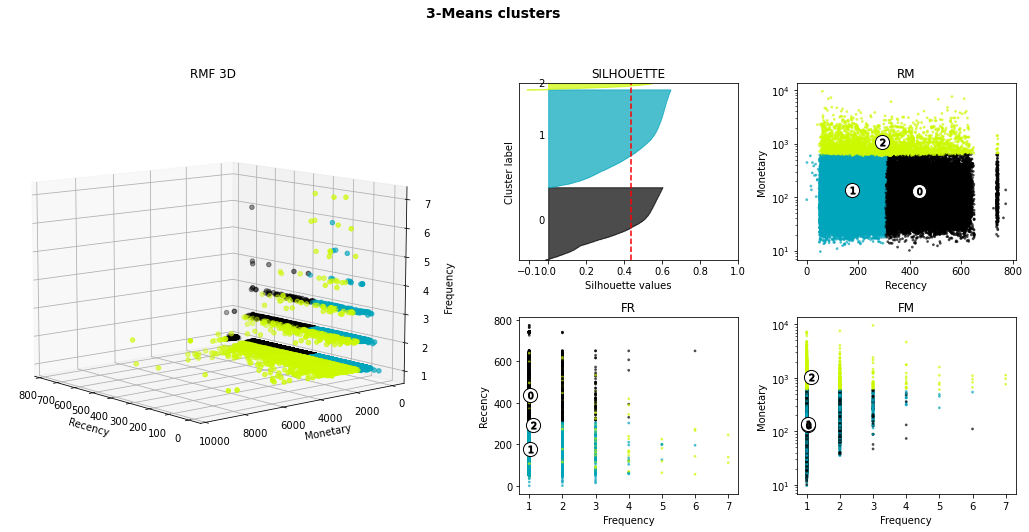

In [5]:
from olist_commons import plot_kmeans_rfm_clusters
plot_kmeans_rfm_clusters(
    rfm, rfm_labels, rfm_centers,
    clu_labels, slh_avg, slh_vals)

## $k$-Means for $k$ in `range(2, 16)`

### 2-Means

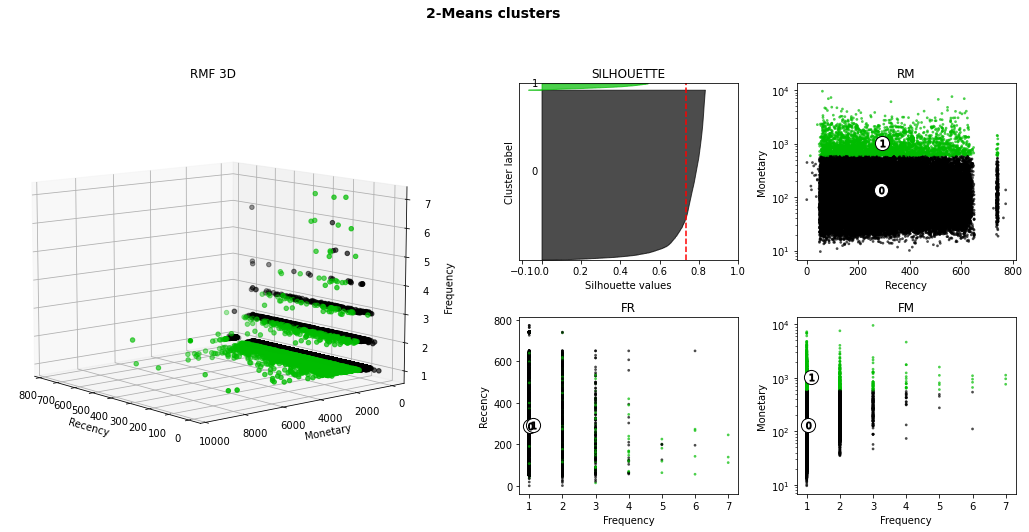

silhouette average : 0.736
k-means fit time : 1.329
silouhette compute time : 238.062


In [7]:
from olist_commons import kmeans_analysis
_ = kmeans_analysis(crfm_1, 2)

### 3-Means

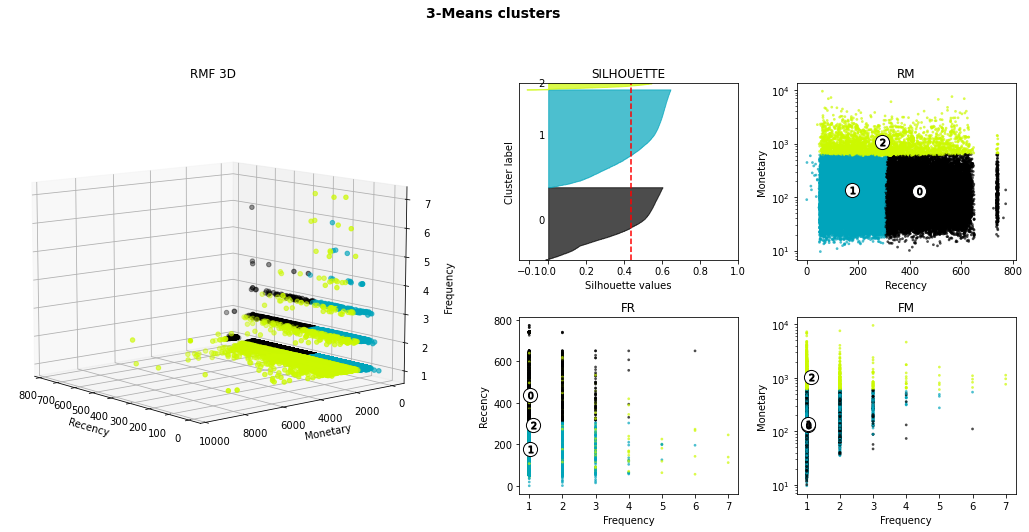

silhouette average : 0.435
k-means fit time : 1.776
silouhette compute time : 223.913


In [8]:
from olist_commons import kmeans_analysis
_ = kmeans_analysis(crfm_1, 3)

### 4-Means

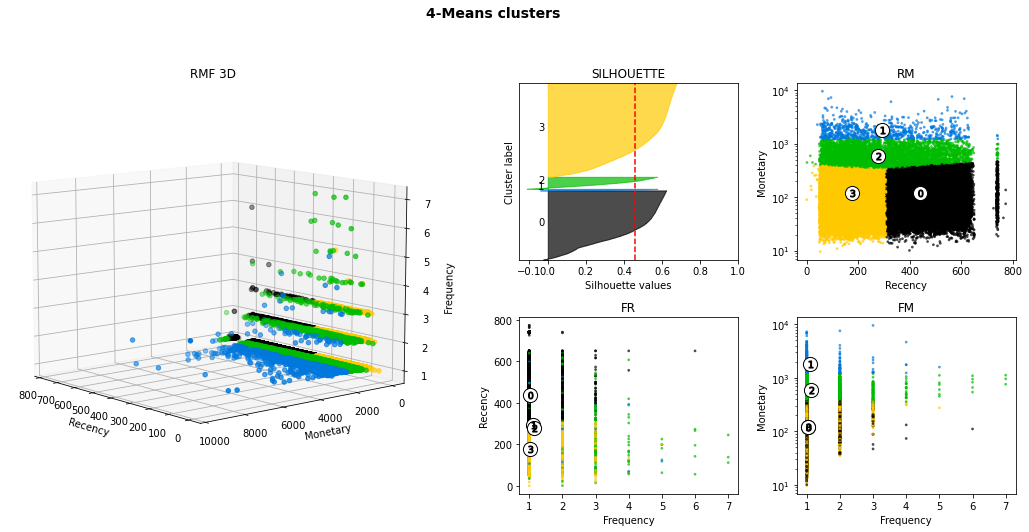

silhouette average : 0.458
k-means fit time : 2.299
silouhette compute time : 219.412


In [9]:
from olist_commons import kmeans_analysis
_ = kmeans_analysis(crfm_1, 4)

### 5-Means

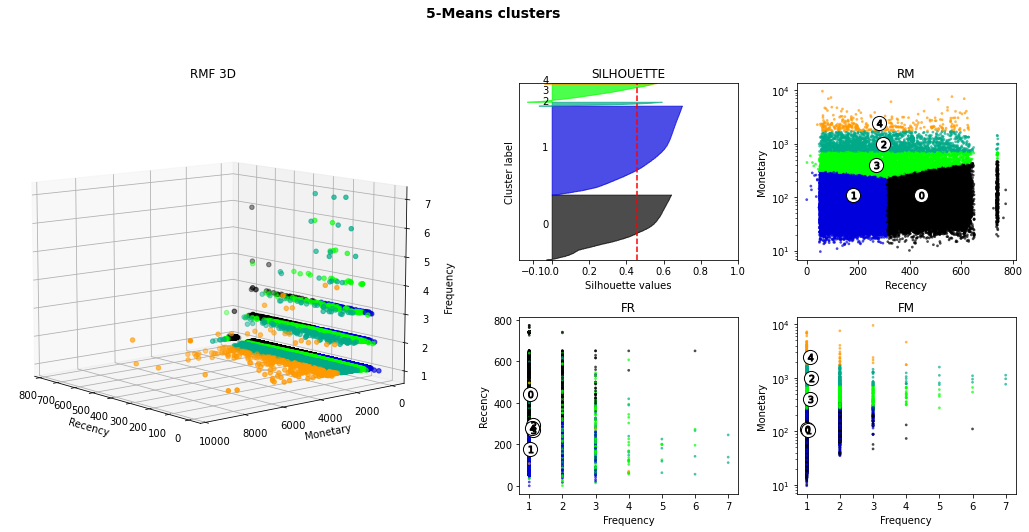

silhouette average : 0.459
k-means fit time : 2.454
silouhette compute time : 214.422


In [10]:
from olist_commons import kmeans_analysis
_ = kmeans_analysis(crfm_1, 5)

### 6-Means

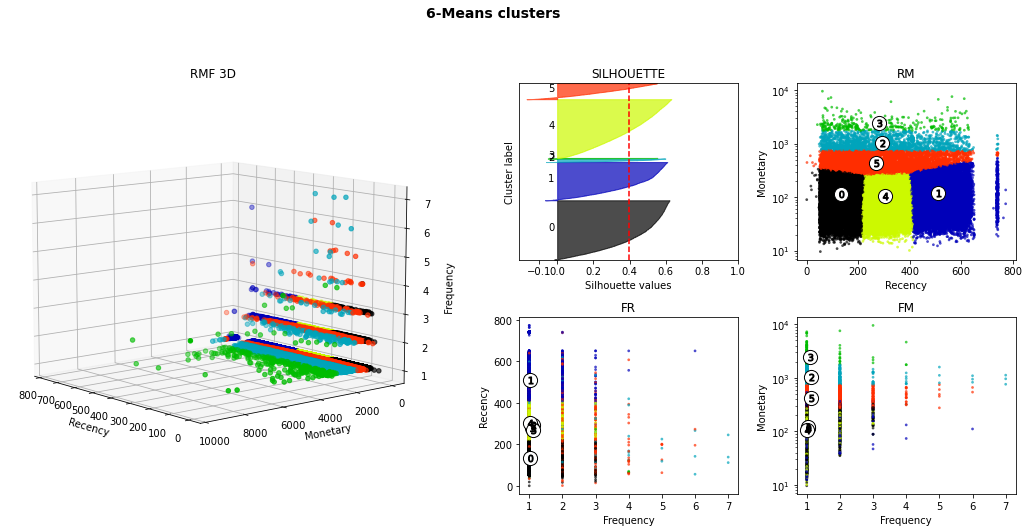

silhouette average : 0.397
k-means fit time : 2.775
silouhette compute time : 213.262


In [11]:
from olist_commons import kmeans_analysis
_ = kmeans_analysis(crfm_1, 6)

### 7, 8, 9, 10, 11, 12, 13, 14, 15-Means

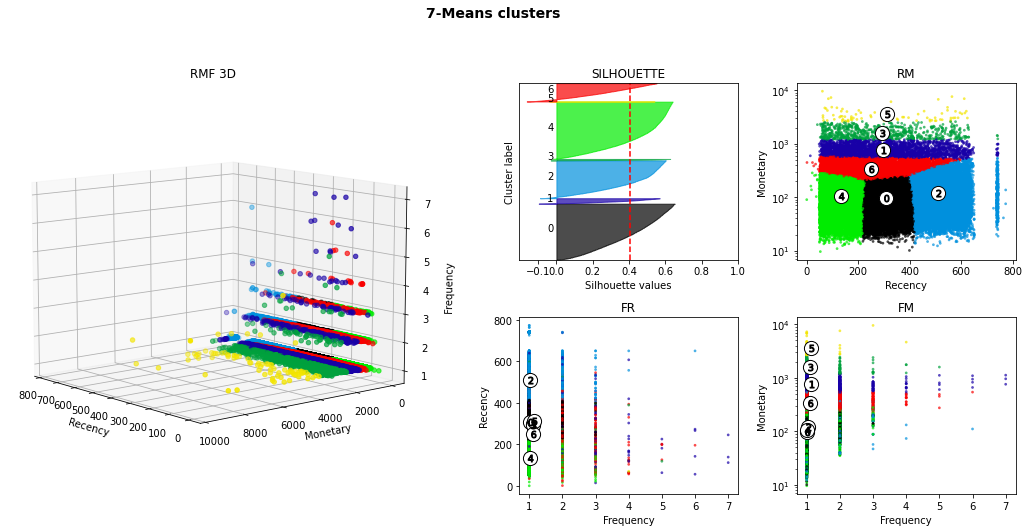

silhouette average : 0.403
k-means fit time : 2.906
silouhette compute time : 206.235


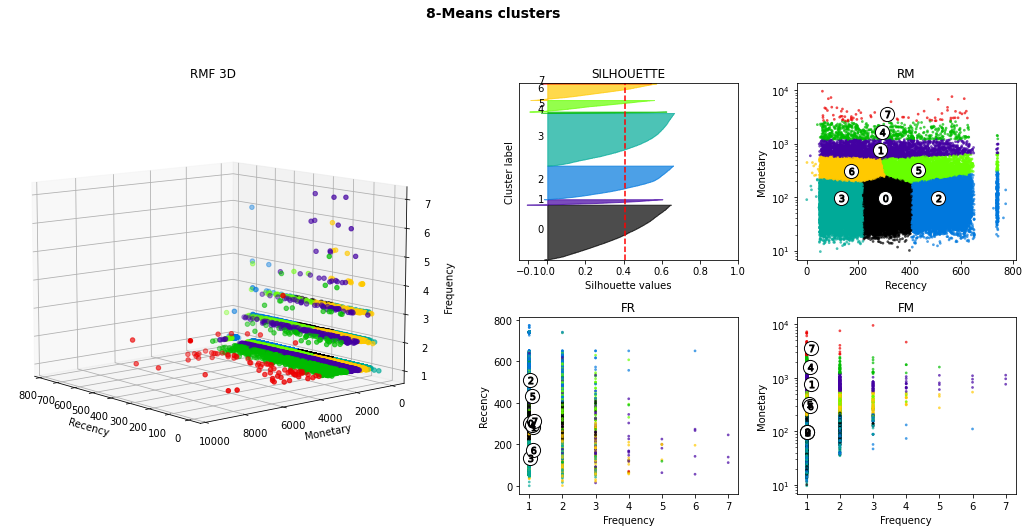

silhouette average : 0.408
k-means fit time : 2.823
silouhette compute time : 207.045


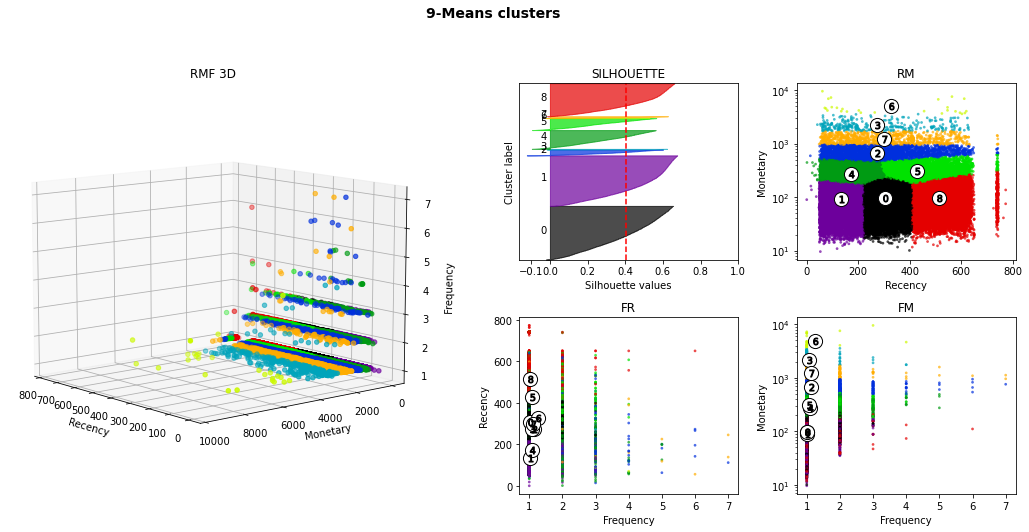

silhouette average : 0.407
k-means fit time : 3.014
silouhette compute time : 198.92


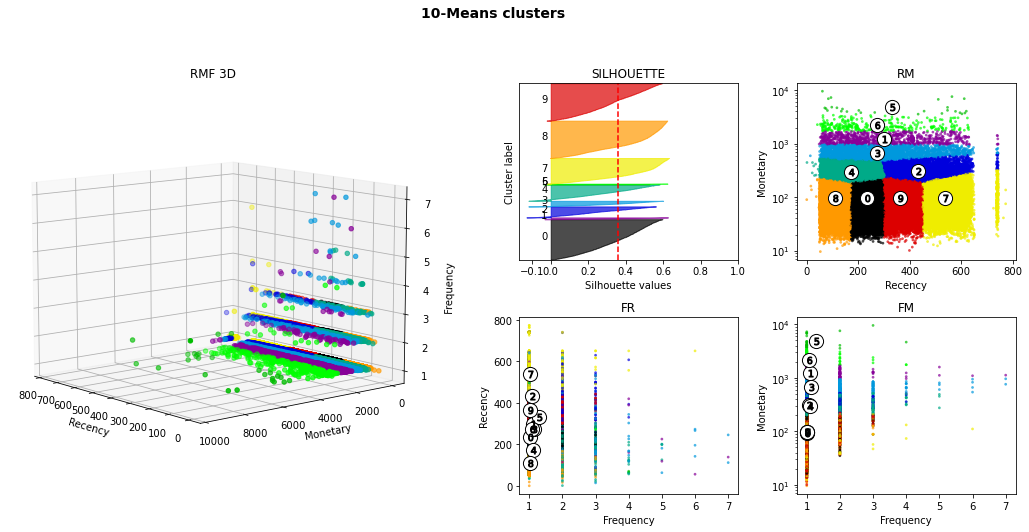

silhouette average : 0.361
k-means fit time : 3.434
silouhette compute time : 199.449


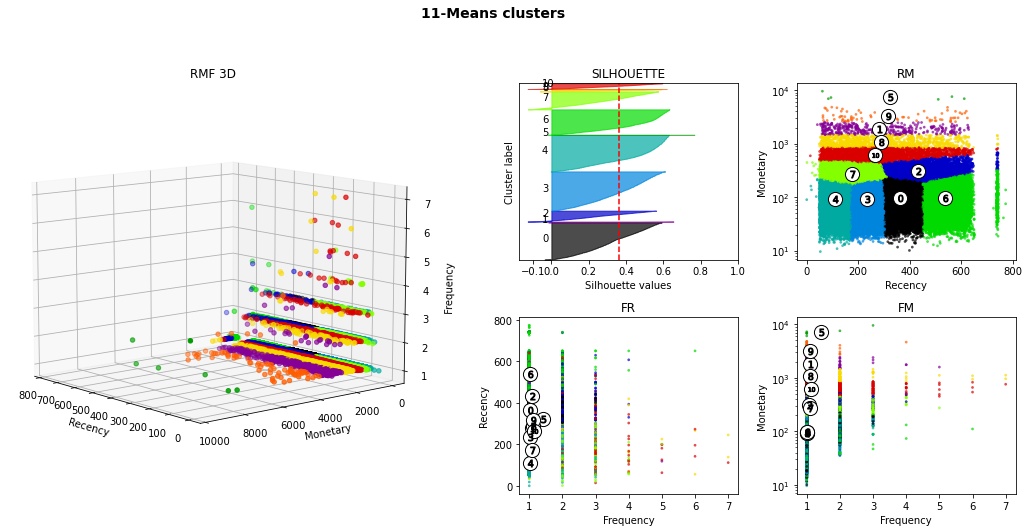

silhouette average : 0.361
k-means fit time : 3.681
silouhette compute time : 198.719


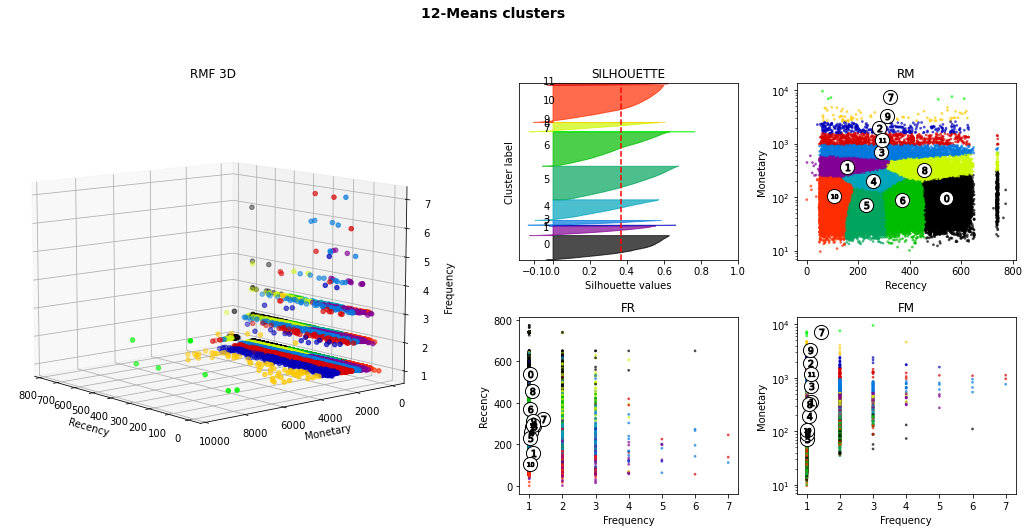

silhouette average : 0.367
k-means fit time : 3.786
silouhette compute time : 182.166


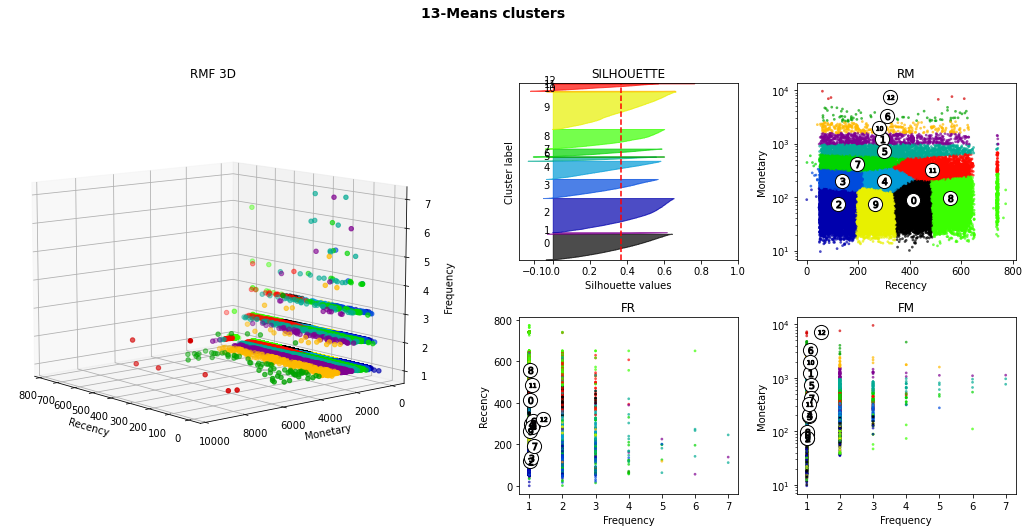

silhouette average : 0.366
k-means fit time : 3.81
silouhette compute time : 185.155


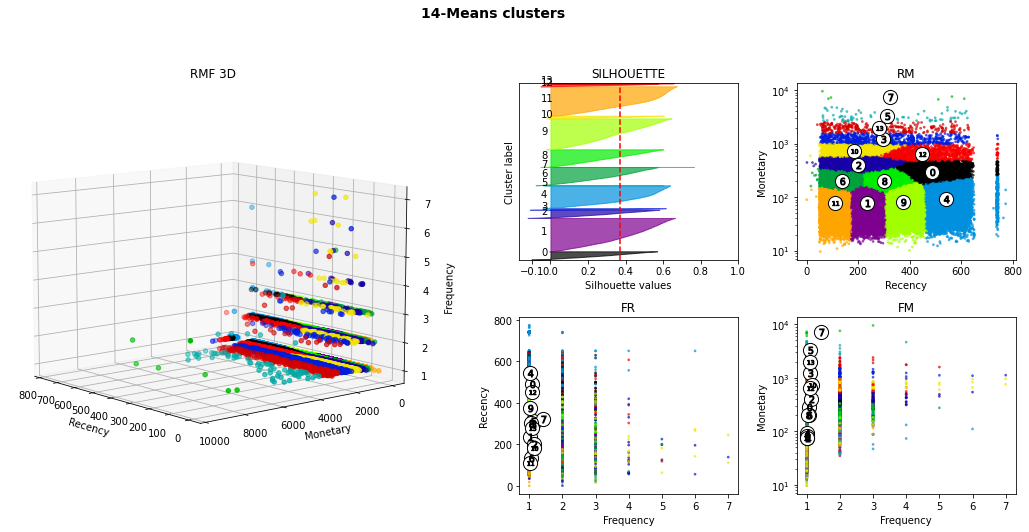

silhouette average : 0.371
k-means fit time : 3.675
silouhette compute time : 198.606


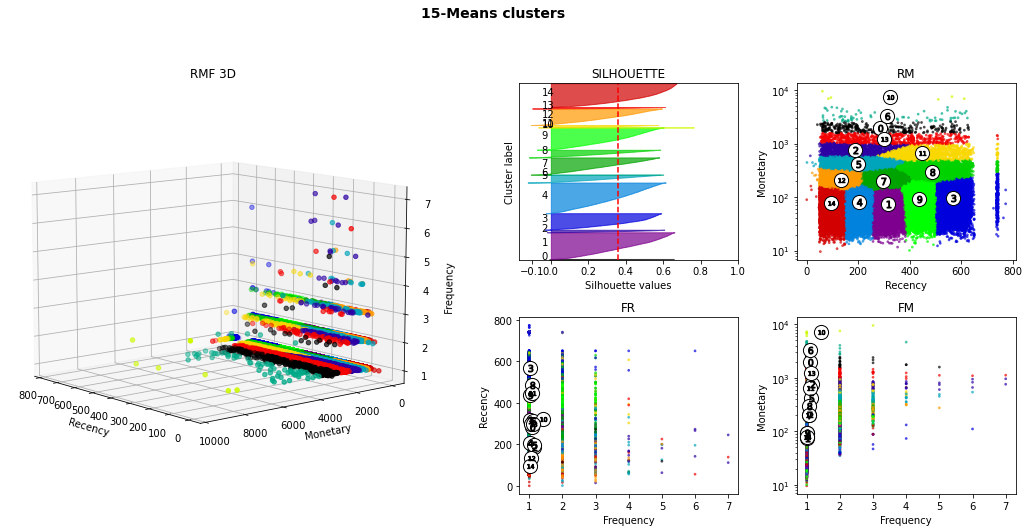

silhouette average : 0.359
k-means fit time : 4.236
silouhette compute time : 192.057


In [12]:
from olist_commons import kmeans_analysis
for n in range(7, 16):
    _ = kmeans_analysis(crfm_1, n)

# Formal selection of the best hyperparameter $k$

We are searching for a formal method to select the optimal number of clusters ($k$) from a business perspective. We are exploring three methods and comparing their results. These methods include:

* Using a distortion graph to identify the *elbow* point,
    * either by measuring the inertia (variance) as a function of $k$,
    * or by measuring the Silhouette coefficient as a function of $k$.
* Using the Davies-Bouldin index.

The elbow method consists of plotting a graph of the inertia or silhouette scores against $k$, and selecting the value of $k$ where there is an "elbow" in the graph. This indicates that the $k$ value at this point is optimal, as it minimizes the inertia or maximizes the silhouette scores without overfitting the data.

The results of these three methods suggest that a value of $k$ = 4 is a good compromise, based on the analysis of the RFM (Recency, Frequency, Monetary) data.

## Intertia

The inertia is the sum of the distances of the data points to their closest centroid.

The smaller the inertia, the better the model is adapted to the data.

In [4]:
from olist_commons import select_k_with_anova

### Not scaled

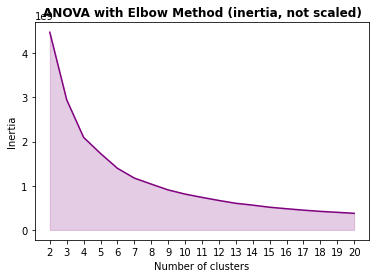

In [2]:
select_k_with_anova(crfm_1)

### Scaled

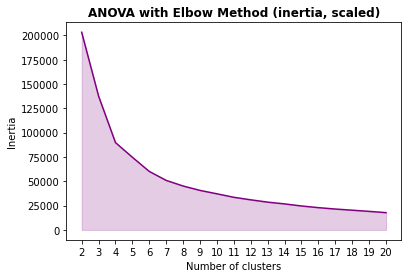

In [5]:
select_k_with_anova(crfm_1, normalize=True)

## Silhouette

The silhouette score measures the similarity of data points within the same cluster and the dissimilarity of data points in different clusters.

The higher the silhouette score, the better the model is suited to the data.

### Not scaled

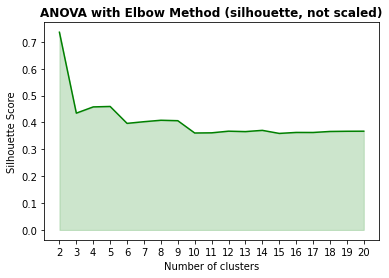

In [6]:
select_k_with_anova(crfm_1, metric='silhouette', color='green')

### Scaled

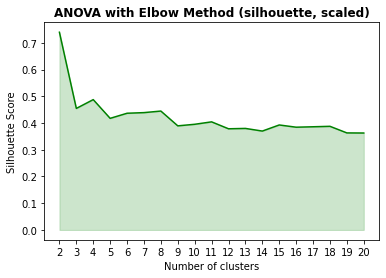

In [7]:
select_k_with_anova(crfm_1, metric='silhouette', color='green', normalize=True)

## Davis-Bouldin

A commonly used approach is to use the Davies-Bouldin Index (DB) to measure the quality of clusters. The Davies-Bouldin Index measures the average distance between the points of a cluster and the cluster centroid, normalized by the distance between the centroids of two different clusters.

The lower the Davies-Bouldin Index, the better the quality of the clusters.

### Not scaled

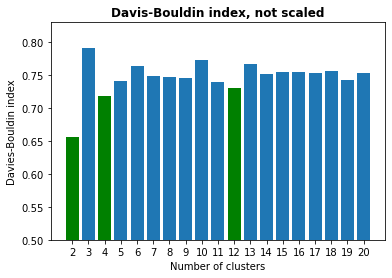

In [15]:
from olist_commons import select_k_with_davies_bouldin
select_k_with_davies_bouldin(crfm_1)

### Scaled

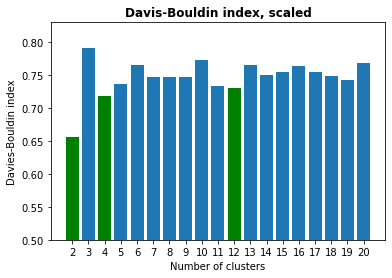

In [16]:
from olist_commons import select_k_with_davies_bouldin
select_k_with_davies_bouldin(crfm_1, normalize=True)

# Expanding features set

## Timelineness

Most customers only ordered once.

For a feature like a delay, it's hard to find more relevant than an average, which will return the single value in most cases.

In [10]:
from olist_commons import get_customer_order_and_review_times
from pepper_commons import discrete_stats

customer_times = get_customer_order_and_review_times()
display(discrete_stats(customer_times))
display(customer_times)

,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
approval_time,95997,33913,99,0.998970,0.353271,float64
carrier_delivering_time,94466,86022,1630,0.983038,0.910613,float64
customer_delivering_time,93356,90950,2740,0.971487,0.974228,float64
processing_estimated_time,96096,93672,0,1.000000,0.974775,float64
approval_to_carrier_delivery_time,94453,85282,1643,0.982903,0.902904,float64
approval_to_customer_delivery_time,93343,90985,2753,0.971352,0.974738,float64
approval_to_estimated_delivery_time,95997,89764,99,0.998970,0.935071,float64
transit_time,93355,89551,2741,0.971476,0.959252,float64
estimated_transit_time,94466,79056,1630,0.983038,0.836873,float64
delivery_advance_time,93356,89270,2740,0.971487,0.956232,float64


,approval_time,carrier_delivering_time,customer_delivering_time,processing_estimated_time,approval_to_carrier_delivery_time,approval_to_customer_delivery_time,approval_to_estimated_delivery_time,transit_time,estimated_transit_time,delivery_advance_time,delivery_to_review_time,review_time
"(_ident_, customer_id)",,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.010313,1.889965,6.411227,10.544132,1.879653,6.400914,10.533819,4.521262,8.654167,4.132905,0.132905,4.572778
0000b849f77a49e4a4ce2b2a4ca5be3f,0.301586,2.046215,3.285590,7.533715,1.744630,2.984005,7.232130,1.239375,5.487500,4.248125,0.248125,0.937095
0000f46a3911fa3c0805444483337064,0.000000,2.662118,25.731759,27.121493,2.662118,25.731759,27.121493,23.069641,24.459375,1.389734,0.389734,1.055370
0000f6ccb0745a6a4b88665a16c9f078,0.013611,0.985162,20.037083,31.146053,0.971551,20.023472,31.132442,19.051921,30.160891,11.108970,0.108970,1.012396
0004aac84e0df4da2b147fca70cf8255,0.014699,2.004491,13.141134,20.176597,1.989792,13.126435,20.161898,11.136644,18.172106,7.035463,0.035463,4.937211
...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,0.010185,14.668646,27.514861,54.124583,14.658461,27.504676,54.114398,12.846215,39.455937,26.609722,0.609722,4.472280
fffea47cd6d3cc0a88bd621562a9d061,0.005833,10.846586,30.097500,32.161157,10.840752,30.091667,32.155324,19.250914,21.314572,2.063657,0.063657,5.494433
ffff371b4d645b6ecea244b27531430a,0.009352,0.760660,14.872083,44.340787,0.751308,14.862731,44.331435,14.111424,43.580127,29.468704,0.468704,2.627326


## Customer satisfaction (Reviews)

Most customers only ordered once, and for a feature like the review score, it is important to highlight customer dissatisfaction as it can be rare but has a significant impact on customer retention. Knowing that more than 50% of customers gave the maximum score, it is crucial to take into account any dissatisfaction as even a single instance can ruin all efforts to ensure customer satisfaction. To highlight this, we calculate a weighted average of the scores, with respective weights of 5, 4, 3, 2, 1 for the scores 1, 2, 3, 4, 5.

In [9]:
from olist_commons import get_customer_satisfaction
from pepper_commons import discrete_stats

customer_satisfaction = get_customer_satisfaction()
display(discrete_stats(customer_satisfaction))

customer_satisfaction.index.name = 'customer_id'
customer_satisfaction.columns = ['satisfaction']
display(customer_satisfaction)

,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
satisfaction,95339,37,757,0.992122,0.000388,float64


,satisfaction
customer_id,
0000366f3b9a7992bf8c76cfdf3221e2,5.0
0000b849f77a49e4a4ce2b2a4ca5be3f,4.0
0000f46a3911fa3c0805444483337064,3.0
0000f6ccb0745a6a4b88665a16c9f078,4.0
0004aac84e0df4da2b147fca70cf8255,5.0
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,5.0
fffea47cd6d3cc0a88bd621562a9d061,4.0
ffff371b4d645b6ecea244b27531430a,5.0


## Territorial location

Hot encoding.

In [13]:
from olist_commons import get_customer_states_ohe
customer_states_ohe = get_customer_states_ohe()
display(customer_states_ohe)

,state_SP,state_RJ,state_MG,state_RS,state_PR,state_SC,state_BA,state_DF,state_ES,state_GO,...,state_PI,state_RN,state_AL,state_SE,state_TO,state_RO,state_AM,state_AC,state_AP,state_RR
customer_id,,,,,,,,,,,,,,,,,,,,,
861eff4711a542e4b93843c6dd7febb0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
290c77bc529b7ac935b93aa66c333dc3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
060e732b5b29e8181a18229c7b0b2b5e,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
259dac757896d24d7702b9acbbff3f3c,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
345ecd01c38d18a9036ed96c73b8d066,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1a29b476fee25c95fbafc67c5ac95cf8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
d52a67c98be1cf6a5c84435bd38d095d,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
e9f50caf99f032f0bf3c55141f019d99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Merging

In [14]:
import pandas as pd
from olist_commons import (
    get_first_order_date,
    get_last_order_date,
    get_customer_RFM
)

crfm = get_customer_RFM(
    relative_to_date=get_last_order_date()
)

import pandas as pd
ext_crfm = pd.concat(
    [
        crfm,
        customer_satisfaction,
        customer_times[[
            'approval_time',
            'customer_delivering_time',
            'delivery_to_review_time',
            'review_time'
        ]],
        customer_states_ohe
    ],
    axis=1,
    # join='outer'   # is the default
)
ext_crfm.index.name = 'customer_id'
display(ext_crfm)

,R,F,M,satisfaction,approval_time,customer_delivering_time,delivery_to_review_time,review_time,state_SP,state_RJ,...,state_PI,state_RN,state_AL,state_SE,state_TO,state_RO,state_AM,state_AC,state_AP,state_RR
customer_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,160.273507,1,141.90,5.0,0.010313,6.411227,0.132905,4.572778,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,163.263090,1,27.19,4.0,0.301586,3.285590,0.248125,0.937095,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0000f46a3911fa3c0805444483337064,585.850868,1,86.22,3.0,0.000000,25.731759,0.389734,1.055370,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0000f6ccb0745a6a4b88665a16c9f078,369.875428,1,43.62,4.0,0.013611,20.037083,0.108970,1.012396,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0004aac84e0df4da2b147fca70cf8255,336.905972,1,196.89,5.0,0.014699,13.141134,0.035463,4.937211,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,495.853958,1,2067.42,5.0,0.010185,27.514861,0.609722,4.472280,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fffea47cd6d3cc0a88bd621562a9d061,310.890532,1,84.58,4.0,0.005833,30.097500,0.063657,5.494433,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ffff371b4d645b6ecea244b27531430a,617.070162,1,112.46,5.0,0.009352,14.872083,0.468704,2.627326,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
